In [74]:
import os
import json
import pickle
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import sparse

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, pos_tag
from gensim import matutils, models


from wordcloud import WordCloud

In [2]:
with open('cleaned_descriptions.json', 'r') as file:
    descriptions = json.load(file)

In [3]:
def stem_words(adict, stemmer):
    for key, value in adict.items():
        adict[key] = [stemmer.stem(word) for word in adict[key]]
    return adict

In [4]:
stemmer = PorterStemmer()
stemmed_discriptions = descriptions.copy()
stemmed_discriptions = stem_words(stemmed_discriptions, stemmer)

In [5]:
asmrtists = list(iter(descriptions.keys()))
asmrtists

['massageasmr',
 'tingtingasmr',
 'gentlewhisperingasmr',
 'whispersredasmr',
 'gibiasmr',
 'asmrrequests',
 'asmrdarling',
 'asmrsurge',
 "jojo'sasmr",
 'zachchoiasmr']

In [6]:
combine_text = lambda list_of_text: ' '.join(list_of_text)
data_combined = {key: [combine_text(value)] for (key, value) in descriptions.items()}

## Corpus

In [7]:
description_df = pd.DataFrame.from_dict(data_combined).transpose()
description_df.columns = ['descriptions']
description_df['asmrtists'] = asmrtists
description_df

,descriptions,asmrtists
massageasmr,asmr hours of my previous best tapping crinkle...,massageasmr
tingtingasmr,use this intense sleep trigger asmr video with...,tingtingasmr
gentlewhisperingasmr,hey guys long time no see hehehe missed you so...,gentlewhisperingasmr
whispersredasmr,hours of asmr many different fabric sounds wit...,whispersredasmr
gibiasmr,hey everybody darkened this video footage bit ...,gibiasmr
asmrrequests,hello friends and fellow tingleheads missed yo...,asmrrequests
asmrdarling,Hello Darlings Triggers was such popular video...,asmrdarling
asmrsurge,is there anybody there who likes scratching so...,asmrsurge
jojo'sasmr,in tonight asmr video we are giving you the to...,jojo'sasmr
zachchoiasmr,most popular food for asmr with stephanie soo ...,zachchoiasmr


In [8]:
# description_df.to_pickle('./asmr_corpus.pkl')

In [9]:
with open('asmr_corpus.pkl', 'rb') as file:
    same_df = pickle.load(file)

In [10]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(description_df.descriptions)
description_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
description_dtm.index = description_df.index
description_dtm = description_dtm.transpose()
description_dtm.head()

,massageasmr,tingtingasmr,gentlewhisperingasmr,whispersredasmr,gibiasmr,asmrrequests,asmrdarling,asmrsurge,jojo'sasmr,zachchoiasmr
ability,2,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,1,1,2,0,0
absorbed,0,0,0,0,0,0,0,1,0,0
accents,1,0,0,0,0,0,0,0,0,0
access,2,0,0,0,0,0,0,0,0,0


In [11]:
top_dict = {}
for creator in description_dtm.columns:
    top = description_dtm[creator].sort_values(ascending=False).head(25)
    top_dict[creator] = list(zip(top.index, top.values))
    
top_dict

{'massageasmr': [('massage', 62),
  ('tapping', 58),
  ('asmr', 42),
  ('body', 39),
  ('touch', 27),
  ('sounds', 25),
  ('video', 24),
  ('relaxation', 21),
  ('experience', 21),
  ('like', 21),
  ('watching', 20),
  ('sleep', 19),
  ('relaxing', 18),
  ('relax', 17),
  ('help', 17),
  ('talking', 17),
  ('focus', 16),
  ('relief', 15),
  ('speed', 15),
  ('better', 14),
  ('circulation', 14),
  ('lower', 13),
  ('trigger', 13),
  ('time', 13),
  ('reduce', 11)],
 'tingtingasmr': [('ear', 23),
  ('hair', 20),
  ('scalp', 13),
  ('asmr', 11),
  ('sounds', 11),
  ('enjoy', 11),
  ('sleep', 10),
  ('treatment', 9),
  ('whispers', 9),
  ('brushing', 7),
  ('triggers', 7),
  ('check', 6),
  ('help', 5),
  ('oil', 4),
  ('tapping', 4),
  ('massage', 4),
  ('face', 4),
  ('gloves', 3),
  ('video', 3),
  ('lice', 3),
  ('real', 3),
  ('latex', 3),
  ('touching', 3),
  ('gentle', 3),
  ('realistic', 3)],
 'gentlewhisperingasmr': [('mp', 28),
  ('sounds', 14),
  ('thank', 13),
  ('play', 10),


In [12]:
words = []
for creator in description_dtm.columns:
    top = [word for (word, count) in top_dict[creator]]
    for t in top:
        words.append(t)
        
words

['massage',
 'tapping',
 'asmr',
 'body',
 'touch',
 'sounds',
 'video',
 'relaxation',
 'experience',
 'like',
 'watching',
 'sleep',
 'relaxing',
 'relax',
 'help',
 'talking',
 'focus',
 'relief',
 'speed',
 'better',
 'circulation',
 'lower',
 'trigger',
 'time',
 'reduce',
 'ear',
 'hair',
 'scalp',
 'asmr',
 'sounds',
 'enjoy',
 'sleep',
 'treatment',
 'whispers',
 'brushing',
 'triggers',
 'check',
 'help',
 'oil',
 'tapping',
 'massage',
 'face',
 'gloves',
 'video',
 'lice',
 'real',
 'latex',
 'touching',
 'gentle',
 'realistic',
 'mp',
 'sounds',
 'thank',
 'play',
 'google',
 'video',
 'itunes',
 'hair',
 'enjoy',
 'hope',
 'tapping',
 'watching',
 'spotify',
 'ill',
 'amazon',
 'face',
 'disclaimer',
 'directory',
 'end',
 'bit',
 'hello',
 'gently',
 'help',
 'audio',
 'ear',
 'hair',
 'sounds',
 'asmr',
 'video',
 'massage',
 'love',
 'brushing',
 'fabric',
 'emma',
 'brush',
 'hope',
 'pens',
 'time',
 'lovely',
 'hand',
 'triggers',
 'head',
 'watercolour',
 'book',
 '

In [13]:
Counter(words).most_common()

[('video', 10),
 ('sounds', 9),
 ('tapping', 7),
 ('asmr', 7),
 ('enjoy', 6),
 ('massage', 5),
 ('triggers', 5),
 ('sleep', 4),
 ('help', 4),
 ('time', 4),
 ('ear', 4),
 ('hair', 4),
 ('face', 4),
 ('hope', 4),
 ('hello', 4),
 ('like', 3),
 ('scalp', 3),
 ('brushing', 3),
 ('relaxation', 2),
 ('watching', 2),
 ('trigger', 2),
 ('treatment', 2),
 ('whispers', 2),
 ('check', 2),
 ('play', 2),
 ('spotify', 2),
 ('bit', 2),
 ('audio', 2),
 ('head', 2),
 ('just', 2),
 ('videos', 2),
 ('mic', 2),
 ('body', 1),
 ('touch', 1),
 ('experience', 1),
 ('relaxing', 1),
 ('relax', 1),
 ('talking', 1),
 ('focus', 1),
 ('relief', 1),
 ('speed', 1),
 ('better', 1),
 ('circulation', 1),
 ('lower', 1),
 ('reduce', 1),
 ('oil', 1),
 ('gloves', 1),
 ('lice', 1),
 ('real', 1),
 ('latex', 1),
 ('touching', 1),
 ('gentle', 1),
 ('realistic', 1),
 ('mp', 1),
 ('thank', 1),
 ('google', 1),
 ('itunes', 1),
 ('ill', 1),
 ('amazon', 1),
 ('disclaimer', 1),
 ('directory', 1),
 ('end', 1),
 ('gently', 1),
 ('love', 

There are clearly words that do not belong. These words will be added to my stop words list and then words will be stemmed. Additionally the top three words are words that almost all the amrtist use and thus are not useful for finding the difference amoung the creators. Those words will be added as well.

In [14]:
add_stop_words = ['videos', 'video', 'asmr', 'com', 'https', 'http', 'sounds', 'channel', 'www', 'patreon', 'new', '¹ë', 'subscribe', \
                  'sound', 'goo', 'gl', 'google', 'org', 'enjoy', '먹방', 'mp', 'spotify', 'amazon', 'itunes', 've', 'im', 'didnt', 'unfortunately', 'know', 'way', \
                  'hello', 'ill']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(description_df.descriptions)
description_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
description_dtm.index = description_df.index
description_dtm = description_dtm.transpose()

In [15]:
top_dict_added_stop_words = {}
for creator in description_dtm.columns:
    top = description_dtm[creator].sort_values(ascending=False).head(15)
    top_dict_added_stop_words[creator] = list(zip(top.index, top.values))
    
top_dict_added_stop_words

{'massageasmr': [('massage', 62),
  ('tapping', 58),
  ('body', 39),
  ('touch', 27),
  ('relaxation', 21),
  ('experience', 21),
  ('like', 21),
  ('watching', 20),
  ('sleep', 19),
  ('relaxing', 18),
  ('help', 17),
  ('relax', 17),
  ('talking', 17),
  ('focus', 16),
  ('relief', 15)],
 'tingtingasmr': [('ear', 23),
  ('hair', 20),
  ('scalp', 13),
  ('sleep', 10),
  ('whispers', 9),
  ('treatment', 9),
  ('triggers', 7),
  ('brushing', 7),
  ('check', 6),
  ('help', 5),
  ('oil', 4),
  ('massage', 4),
  ('tapping', 4),
  ('face', 4),
  ('use', 3)],
 'gentlewhisperingasmr': [('thank', 13),
  ('play', 10),
  ('hope', 9),
  ('hair', 9),
  ('tapping', 8),
  ('watching', 7),
  ('face', 6),
  ('bit', 5),
  ('gently', 5),
  ('help', 5),
  ('disclaimer', 5),
  ('end', 5),
  ('directory', 5),
  ('going', 4),
  ('ear', 4)],
 'whispersredasmr': [('hair', 18),
  ('massage', 8),
  ('love', 8),
  ('fabric', 8),
  ('brushing', 8),
  ('emma', 8),
  ('brush', 7),
  ('time', 6),
  ('pens', 6),
  ('

In [16]:
wc = WordCloud(stopwords=stop_words, background_color='white', max_font_size=120, random_state=10)

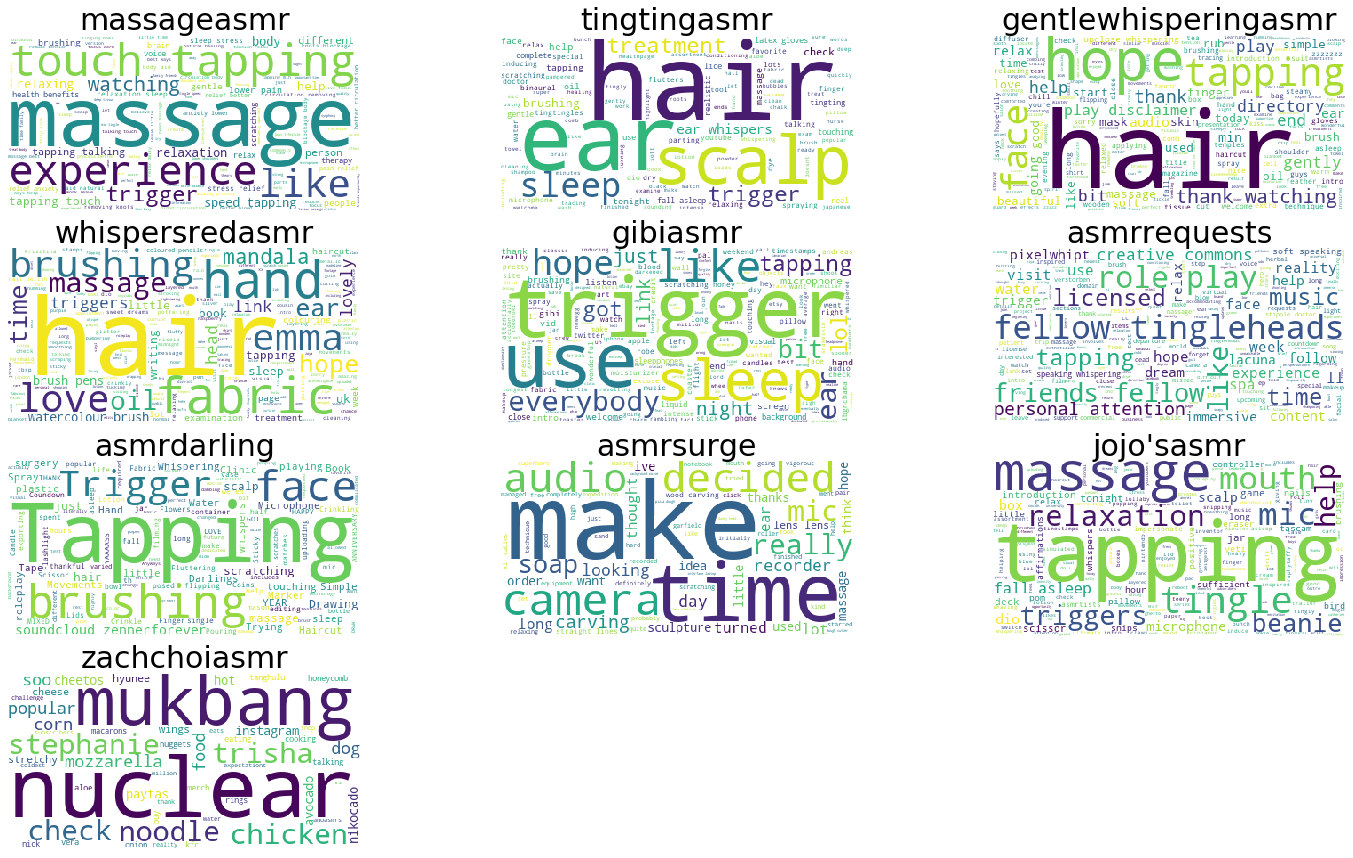

In [17]:
# os.mkdir('./asmr_word_clouds')
# os.chdir('./asmr_word_clouds')
plt.rcParams['figure.figsize'] = (25, 15)
for idx, creator in enumerate(description_dtm.columns):
    wc.generate(description_df.descriptions[creator])
#     wc.to_file(f'{creator}_wordcloud.png')
    plt.subplot(4, 3, idx+1)
    plt.axis('off')
    plt.title(asmrtists[idx], size=30)
    plt.imshow(wc);
# os.chdir('..')

C:\Users\JR\Anaconda3\envs\asmr\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


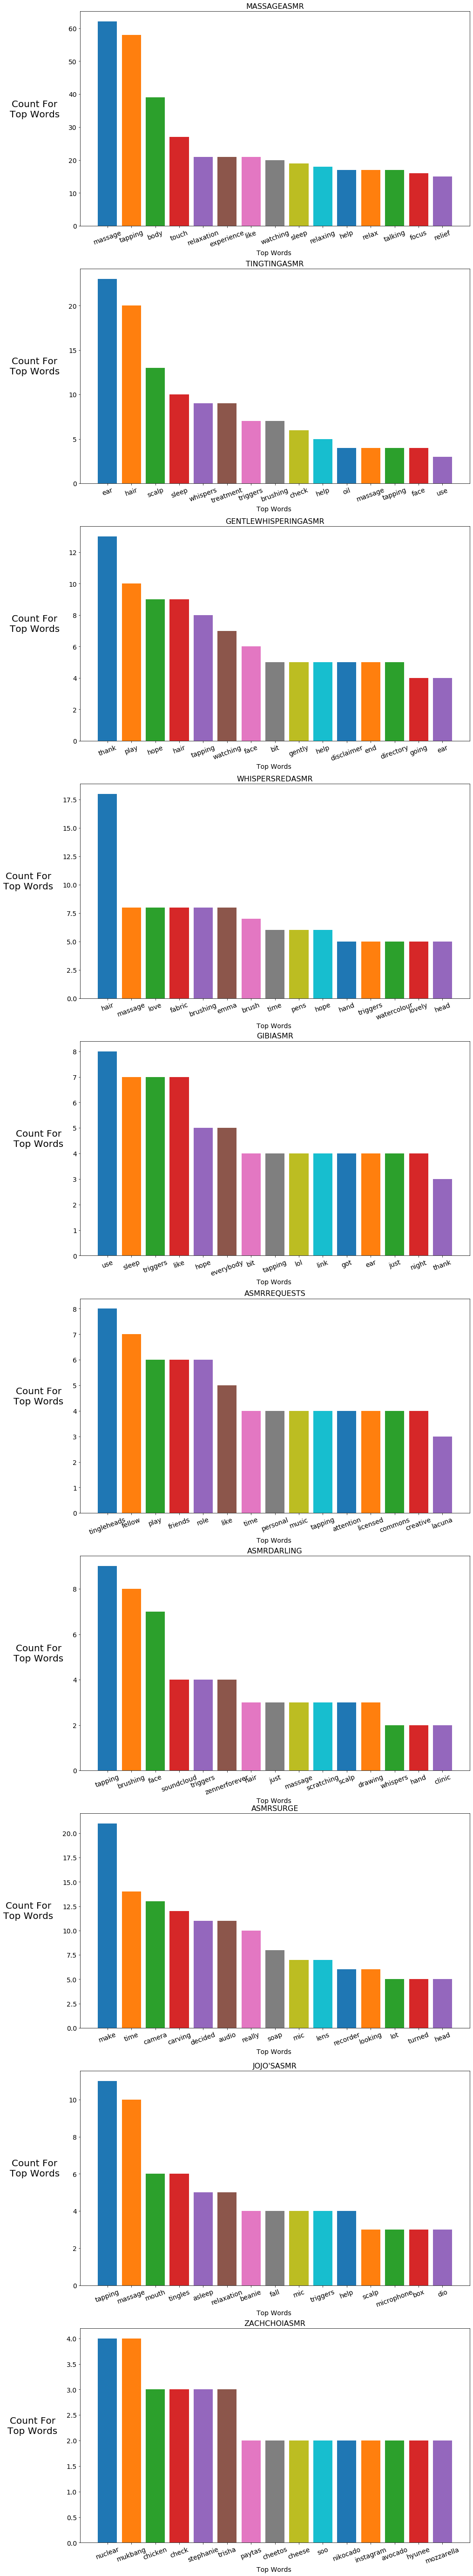

In [18]:
plt.rcParams['figure.figsize'] = (15, 100)

for idx, creator in enumerate(description_dtm.columns):
    for word, count in top_dict_added_stop_words[creator]:
        plt.subplot(10, 1, idx+1)
        plt.bar(word, count)
        plt.title(creator.upper(), size=16)
        plt.xlabel(f'Top Words ', size=14)
        plt.ylabel('Count For \nTop Words ', size=20, rotation=0, labelpad=70)
        plt.xticks(size=14, rotation=20)
        plt.yticks(size=14)
        hspace = 15
        bottom = 15 ;

In [19]:
unique_list = [description_dtm[asmrtist].nonzero()[0].size for asmrtist in description_dtm.columns]
description_words = pd.DataFrame(list(zip(asmrtists, unique_list)), columns=['youtuber', 'unique_words']).sort_values('unique_words')
description_words

C:\Users\JR\Anaconda3\envs\asmr\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


,youtuber,unique_words
9,zachchoiasmr,53
1,tingtingasmr,115
6,asmrdarling,129
8,jojo'sasmr,189
2,gentlewhisperingasmr,299
4,gibiasmr,324
3,whispersredasmr,358
5,asmrrequests,366
0,massageasmr,448
7,asmrsurge,542


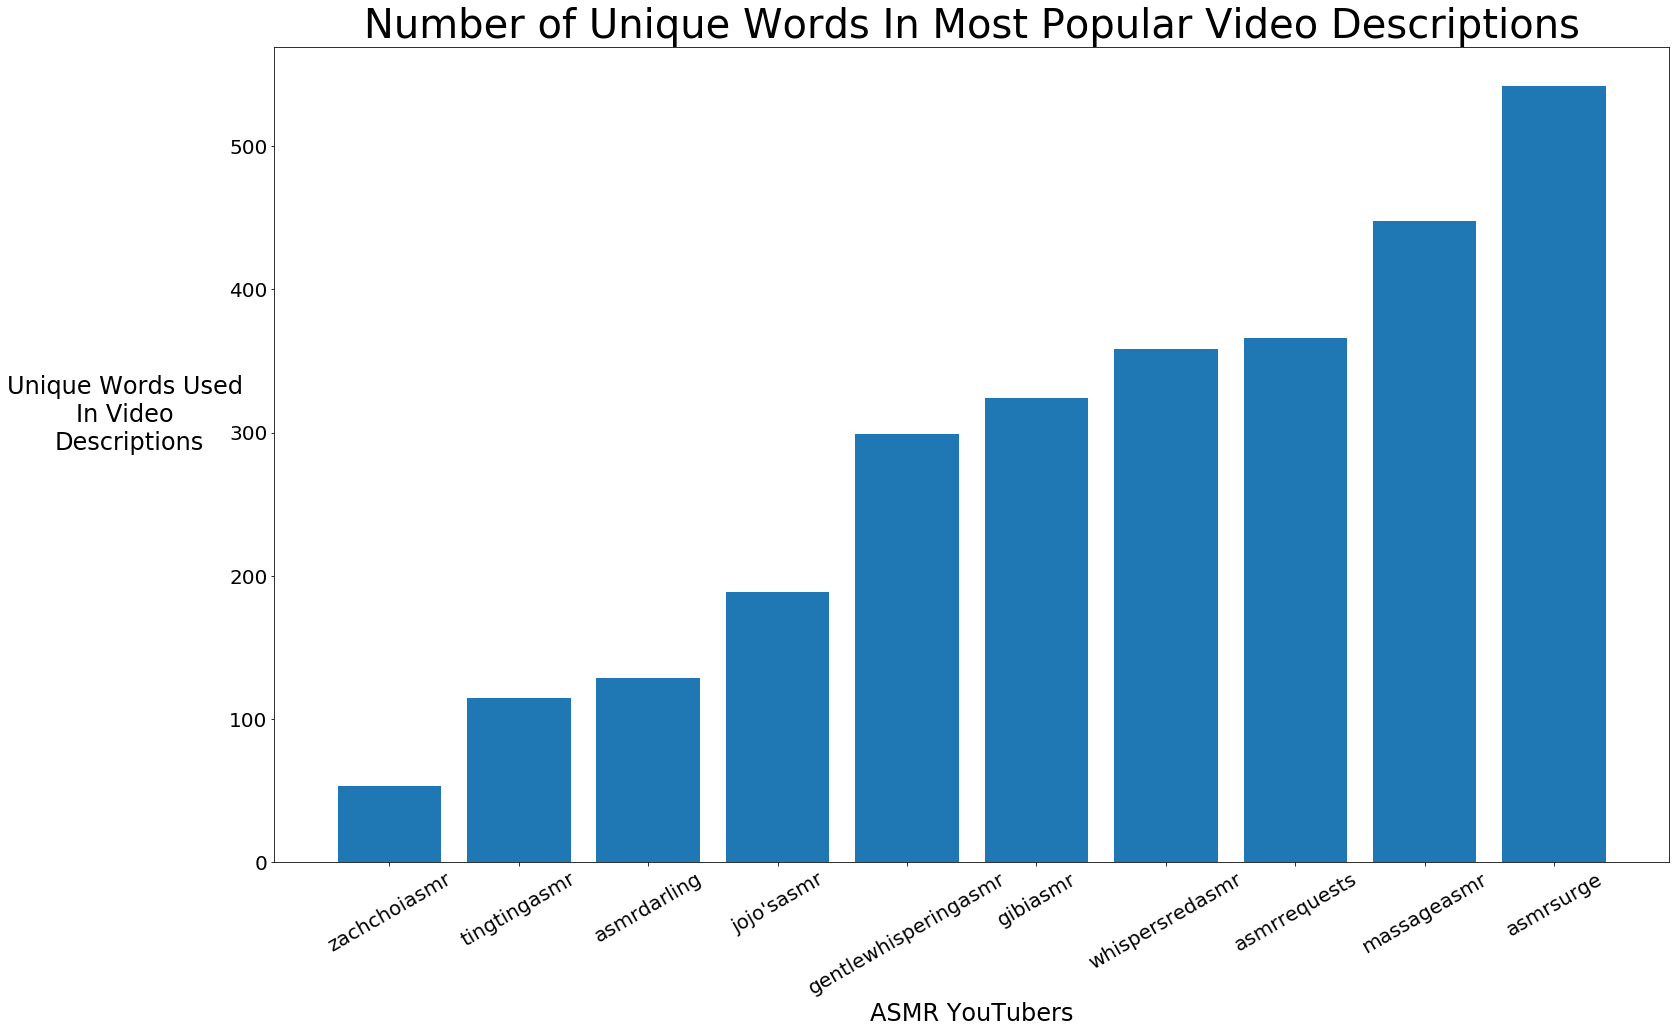

In [20]:
plt.rcParams['figure.figsize'] = (25, 15)
plt.bar(description_words['youtuber'], description_words['unique_words'])
plt.xlabel('ASMR YouTubers',size=24)
plt.ylabel('Unique Words Used \nIn Video \nDescriptions', size=24, rotation=0, labelpad=100)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.title('Number of Unique Words In Most Popular Video Descriptions', size=40)
plt.show();

# Topic Modeling

In [21]:
sparse_counts = sparse.csr_matrix(description_dtm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [22]:
id2word = dict((value, key) for key, value in cv.vocabulary_.items())

### LDA Changing the Number of Topics

In [23]:
# LDA for num_topics = 2
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10, random_state=10)
lda.print_topics()

[(0,
  '0.013*"hair" + 0.010*"tapping" + 0.009*"ear" + 0.008*"massage" + 0.007*"brushing" + 0.007*"make" + 0.007*"time" + 0.006*"face" + 0.006*"triggers" + 0.006*"scalp"'),
 (1,
  '0.021*"tapping" + 0.021*"massage" + 0.013*"body" + 0.009*"like" + 0.009*"touch" + 0.009*"sleep" + 0.007*"relaxation" + 0.007*"watching" + 0.007*"experience" + 0.006*"relax"')]

In [24]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10, random_state=10)
lda.print_topics()

[(0,
  '0.016*"hair" + 0.011*"ear" + 0.010*"massage" + 0.010*"tapping" + 0.009*"brushing" + 0.008*"make" + 0.008*"triggers" + 0.007*"scalp" + 0.007*"time" + 0.006*"face"'),
 (1,
  '0.007*"use" + 0.006*"sleep" + 0.006*"triggers" + 0.006*"like" + 0.005*"hope" + 0.005*"check" + 0.005*"everybody" + 0.004*"tapping" + 0.004*"ear" + 0.004*"just"'),
 (2,
  '0.023*"tapping" + 0.022*"massage" + 0.013*"body" + 0.009*"like" + 0.009*"touch" + 0.009*"watching" + 0.008*"help" + 0.008*"experience" + 0.008*"relax" + 0.008*"relaxation"')]

In [25]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10, random_state=10)
lda.print_topics()

[(0,
  '0.022*"hair" + 0.016*"tapping" + 0.014*"ear" + 0.012*"massage" + 0.012*"brushing" + 0.009*"scalp" + 0.009*"face" + 0.009*"triggers" + 0.007*"thank" + 0.007*"sleep"'),
 (1,
  '0.009*"use" + 0.008*"sleep" + 0.008*"triggers" + 0.008*"like" + 0.006*"hope" + 0.006*"everybody" + 0.005*"tapping" + 0.005*"ear" + 0.005*"bit" + 0.005*"just"'),
 (2,
  '0.020*"massage" + 0.018*"tapping" + 0.011*"body" + 0.009*"time" + 0.008*"like" + 0.008*"touch" + 0.007*"relaxation" + 0.007*"experience" + 0.007*"help" + 0.007*"make"'),
 (3,
  '0.008*"nuclear" + 0.008*"mukbang" + 0.006*"check" + 0.006*"stephanie" + 0.006*"trisha" + 0.006*"chicken" + 0.004*"popular" + 0.004*"hot" + 0.004*"instagram" + 0.004*"corn"')]

In [26]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10, random_state=10)
lda.print_topics()

[(0,
  '0.013*"make" + 0.011*"tapping" + 0.010*"massage" + 0.008*"time" + 0.008*"camera" + 0.007*"mic" + 0.007*"carving" + 0.006*"audio" + 0.006*"decided" + 0.006*"really"'),
 (1,
  '0.001*"tapping" + 0.001*"massage" + 0.001*"hair" + 0.001*"sleep" + 0.001*"ear" + 0.001*"body" + 0.001*"relaxation" + 0.001*"help" + 0.001*"touch" + 0.001*"like"'),
 (2,
  '0.024*"tapping" + 0.023*"massage" + 0.013*"body" + 0.010*"like" + 0.010*"touch" + 0.009*"watching" + 0.009*"help" + 0.008*"relax" + 0.008*"experience" + 0.008*"relaxation"'),
 (3,
  '0.009*"nuclear" + 0.009*"mukbang" + 0.007*"check" + 0.007*"stephanie" + 0.007*"trisha" + 0.007*"chicken" + 0.005*"popular" + 0.005*"instagram" + 0.005*"hot" + 0.005*"noodles"'),
 (4,
  '0.023*"hair" + 0.018*"ear" + 0.013*"sleep" + 0.011*"triggers" + 0.011*"brushing" + 0.008*"scalp" + 0.008*"treatment" + 0.007*"tapping" + 0.007*"massage" + 0.006*"hope"')]

In [27]:
def nouns_verbs_adverbs(text):
    is_noun_verb_adverb = lambda pos: pos[:2] == 'NN' or pos[:2] == 'VB' or pos[:2] == 'RB'
    tokenized = word_tokenize(text)
    all_noun_verb_adverb = [word for (word, pos) in pos_tag(tokenized) if is_noun_verb_adverb(pos)]
    return ' '.join(all_noun_verb_adverb)

In [28]:
data_nvrb = pd.DataFrame(description_df.descriptions.apply(nouns_verbs_adverbs))

In [29]:
data_nvrb

,descriptions
massageasmr,hours tapping crinkle trigger video joined tog...
tingtingasmr,use sleep trigger video sounds help fall enjoy...
gentlewhisperingasmr,hey guys time see hehehe missed so thank messa...
whispersredasmr,hours sounds talking apart very mouth time sta...
gibiasmr,hey everybody darkened video footage bit test ...
asmrrequests,hello friends tingleheads missed guys was town...
asmrdarling,Hello Darlings Triggers was video had make Tri...
asmrsurge,is anybody likes scratching sounds so video be...
jojo'sasmr,asmr are giving ten asmr triggers help induce ...
zachchoiasmr,most food asmr soo honeycomb aloe vera tanghul...


In [30]:
add_stop_words = ['videos', 'video', 'asmr', 'com', 'https', 'http', 'sounds', 'channel', 'www', 'patreon', 'new', '¹ë', 'subscribe', \
                  'sound', 'goo', 'gl', 'google', 'org', 'enjoy', 'mp', 'spotify', 'amazon', 'itunes', 've', 'im', 'didnt', 'unfortunately', 'know', 'way', \
                  'hello', 'ill', 'got']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(description_df.descriptions)
description_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
description_dtm.index = description_df.index
description_dtm = description_dtm.transpose()

In [31]:
cv_nvrb = CountVectorizer(stop_words=stop_words)
data_cv_nvrb = cv_nvrb.fit_transform(data_nvrb.descriptions)
description_nvrb = pd.DataFrame(data_cv_nvrb.toarray(), columns=cv_nvrb.get_feature_names())
description_nvrb.index = data_nvrb.index
description_nvrb

,ability,accents,access,accidentally,accidently,accommodating,acetylcholine,actions,activates,actor,...,youre,youtube,youtubers,zeitgeist,zen,zennerforever,zoom,zzzzz,zzzzzzz,먹방
massageasmr,2,1,2,0,0,0,2,1,2,0,...,0,2,0,0,0,0,1,0,0,0
tingtingasmr,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
gentlewhisperingasmr,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,2,0
whispersredasmr,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
gibiasmr,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asmrrequests,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
asmrdarling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
asmrsurge,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
jojo'sasmr,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
zachchoiasmr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [32]:
corpus_nvrb = matutils.Sparse2Corpus(sparse.csr_matrix(description_nvrb.transpose()))
id2word_nvrb = dict((value, key) for key, value in cv_nvrb.vocabulary_.items())

In [33]:
# LDA with 4 topics and only Nouns, Verbs, and Adverbs
lda_nvrb = models.LdaModel(corpus=corpus_nvrb, num_topics=4, id2word=id2word_nvrb, passes=10, random_state=10)
lda_nvrb.print_topics()

[(0,
  '0.037*"tapping" + 0.035*"massage" + 0.018*"body" + 0.012*"help" + 0.011*"hair" + 0.011*"ear" + 0.011*"brushing" + 0.010*"triggers" + 0.010*"relax" + 0.010*"experience"'),
 (1,
  '0.001*"massage" + 0.001*"tapping" + 0.001*"body" + 0.001*"time" + 0.001*"watching" + 0.001*"hair" + 0.001*"thank" + 0.001*"play" + 0.001*"hope" + 0.001*"make"'),
 (2,
  '0.015*"make" + 0.011*"time" + 0.009*"hope" + 0.008*"camera" + 0.008*"carving" + 0.008*"thank" + 0.007*"decided" + 0.007*"audio" + 0.007*"really" + 0.007*"play"'),
 (3,
  '0.011*"hair" + 0.008*"hope" + 0.008*"triggers" + 0.007*"brushing" + 0.007*"tapping" + 0.007*"time" + 0.006*"massage" + 0.005*"use" + 0.005*"face" + 0.005*"play"')]

In [34]:
# LDA with 5 topics and only Nouns, Verbs, and Adverbs
lda_nvrb = models.LdaModel(corpus=corpus_nvrb, num_topics=5, id2word=id2word_nvrb, passes=100, random_state=10)
lda_nvrb.print_topics()

[(0,
  '0.039*"tapping" + 0.037*"massage" + 0.019*"body" + 0.013*"help" + 0.012*"ear" + 0.012*"brushing" + 0.012*"hair" + 0.010*"experience" + 0.010*"relax" + 0.010*"triggers"'),
 (1,
  '0.001*"subscribers" + 0.001*"buy" + 0.001*"cooking" + 0.001*"expectations" + 0.001*"challenge" + 0.001*"shop" + 0.001*"honeycomb" + 0.001*"dog" + 0.001*"merch" + 0.001*"kfc"'),
 (2,
  '0.015*"make" + 0.012*"time" + 0.009*"hope" + 0.008*"thank" + 0.008*"camera" + 0.008*"carving" + 0.008*"decided" + 0.007*"audio" + 0.007*"really" + 0.007*"play"'),
 (3,
  '0.011*"hair" + 0.009*"triggers" + 0.009*"hope" + 0.007*"brushing" + 0.007*"tapping" + 0.007*"time" + 0.006*"massage" + 0.006*"use" + 0.005*"brush" + 0.005*"love"'),
 (4,
  '0.001*"subscribers" + 0.001*"buy" + 0.001*"cooking" + 0.001*"expectations" + 0.001*"challenge" + 0.001*"shop" + 0.001*"honeycomb" + 0.001*"dog" + 0.001*"merch" + 0.001*"kfc"')]

In [35]:
# LDA with 6 topics and only Nouns, Verbs, and Adverbs
lda_nvrb = models.LdaModel(corpus=corpus_nvrb, num_topics=6, id2word=id2word_nvrb, passes=40, random_state=10)
lda_nvrb.print_topics()

[(0,
  '0.040*"tapping" + 0.038*"massage" + 0.019*"body" + 0.013*"help" + 0.012*"ear" + 0.012*"brushing" + 0.012*"hair" + 0.010*"experience" + 0.010*"relax" + 0.010*"triggers"'),
 (1,
  '0.019*"thank" + 0.016*"play" + 0.014*"hope" + 0.013*"hair" + 0.013*"tapping" + 0.011*"watching" + 0.010*"face" + 0.008*"bit" + 0.008*"gently" + 0.008*"end"'),
 (2,
  '0.001*"tapping" + 0.001*"massage" + 0.001*"time" + 0.001*"hair" + 0.001*"body" + 0.001*"hope" + 0.001*"make" + 0.001*"experience" + 0.001*"help" + 0.001*"brushing"'),
 (3,
  '0.009*"use" + 0.009*"triggers" + 0.008*"hope" + 0.008*"tingleheads" + 0.008*"tapping" + 0.006*"friends" + 0.006*"attention" + 0.006*"role" + 0.006*"music" + 0.006*"play"'),
 (4,
  '0.001*"tapping" + 0.001*"massage" + 0.001*"body" + 0.001*"time" + 0.001*"help" + 0.001*"hair" + 0.001*"play" + 0.001*"relaxation" + 0.001*"relax" + 0.001*"experience"'),
 (5,
  '0.014*"make" + 0.013*"time" + 0.011*"hair" + 0.008*"camera" + 0.008*"really" + 0.008*"carving" + 0.008*"massage"

In [68]:
# LDA with 8 topics and only Nouns, Verbs, and Adverbs
lda_nvrb = models.LdaModel(corpus=corpus_nvrb, num_topics=8, id2word=id2word_nvrb, passes=150, random_state=40)
lda_nvrb.print_topics()

[(0,
  '0.001*"raise" + 0.001*"rambling" + 0.001*"racke" + 0.001*"raffytaphy" + 0.001*"rain" + 0.001*"quite" + 0.001*"raspberry" + 0.001*"raphytaffy" + 0.001*"quieter" + 0.001*"range"'),
 (1,
  '0.021*"thank" + 0.017*"play" + 0.016*"hope" + 0.014*"hair" + 0.014*"tapping" + 0.012*"watching" + 0.011*"face" + 0.009*"end" + 0.009*"gently" + 0.009*"help"'),
 (2,
  '0.016*"mukbang" + 0.012*"check" + 0.012*"먹방" + 0.012*"chicken" + 0.008*"hyunee" + 0.008*"noodles" + 0.008*"mozzarella" + 0.008*"paytas" + 0.008*"nikocado" + 0.008*"soo"'),
 (3,
  '0.025*"ear" + 0.024*"hair" + 0.021*"brushing" + 0.021*"triggers" + 0.017*"tapping" + 0.014*"scalp" + 0.013*"whispers" + 0.012*"face" + 0.012*"use" + 0.012*"treatment"'),
 (4,
  '0.024*"hair" + 0.012*"love" + 0.012*"brushing" + 0.012*"massage" + 0.009*"brush" + 0.009*"hope" + 0.009*"time" + 0.009*"pens" + 0.009*"emma" + 0.007*"hand"'),
 (5,
  '0.027*"tapping" + 0.024*"massage" + 0.015*"tingles" + 0.015*"mouth" + 0.012*"relaxation" + 0.010*"fall" + 0.010*

#### ASMR Topics produced

    * Topic 0: Seems like everything that was left over and didn't belong to the other topics.
    * Topic 1: Positive Affirmations (words like thank, hope, help, and gently would suggest a helping hand.
    * Topic 2: Food and eating sounds (after looking up what a "mukbang" is, this is clearly the topic).
    * Topic 3: A combination of tapping and Hair/facial treatment roleplay.
    * Topic 4: Different brushing triggers.
    * Topic 5: Insomia help.
    * Topic 6: Vicarious massages (massaging roleplays)
    * Topic 7: Carpentry/arts and crafts (the use of props)

In [69]:
corpus_transformed = lda_nvrb[corpus_nvrb]
list(corpus_transformed)

[[(6, 0.9992789)],
 [(3, 0.995984)],
 [(1, 0.9977494)],
 [(4, 0.9982933)],
 [(3, 0.99754107)],
 [(7, 0.9977828)],
 [(3, 0.38159448), (7, 0.6139888)],
 [(7, 0.9988233)],
 [(5, 0.9960388)],
 [(2, 0.9867405)]]

In [73]:
asmrtists = iter(data_nvrb.index)
for i in corpus_transformed:
    asmrtist = next(asmrtists)
    print(f'{asmrtist}:')
    for j in i:
        topic, percentage = j
        percentage = round(percentage, 5)
        print('Topic-{} {}'.format(topic, round(percentage*100, 5)))
    print()

massageasmr:
Topic-6 99.928

tingtingasmr:
Topic-3 99.598

gentlewhisperingasmr:
Topic-1 99.775

whispersredasmr:
Topic-4 99.829

gibiasmr:
Topic-3 99.754

asmrrequests:
Topic-7 99.778

asmrdarling:
Topic-3 38.159
Topic-7 61.399

asmrsurge:
Topic-7 99.882

jojo'sasmr:
Topic-5 99.604

zachchoiasmr:
Topic-2 98.674



In [78]:
# Save model to folder.
# lda_nvrb.save('asmr_lda_nvrb')